## Regresión Lineal en Python

A continuación veremos cómo podemos implementar este modelo en Python. Para ello, utilizaremos la librería `scikit-learn`.

### Regresión lineal simple

Para ejemplificar la implementación de un modelo de regresión lineal simple utilizaremos un conjunto de datos con pocas instancias y que ya ha sido previamente tratado con un EDA completo.

#### Paso 1. Lectura del conjunto de datos procesado

In [1]:
import pandas as pd

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_salary_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_salary_test.csv")

train_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,2.0,43525.0
3,2.2,39891.0
4,2.9,56642.0


Como en este notebook no se ha mostrado el proceso de análisis exploratorio, a continuación y utilizando un diagrama de puntos se visualizará la relación entre la variable predictora y la objetivo (esto se ve en el análisis univariante):

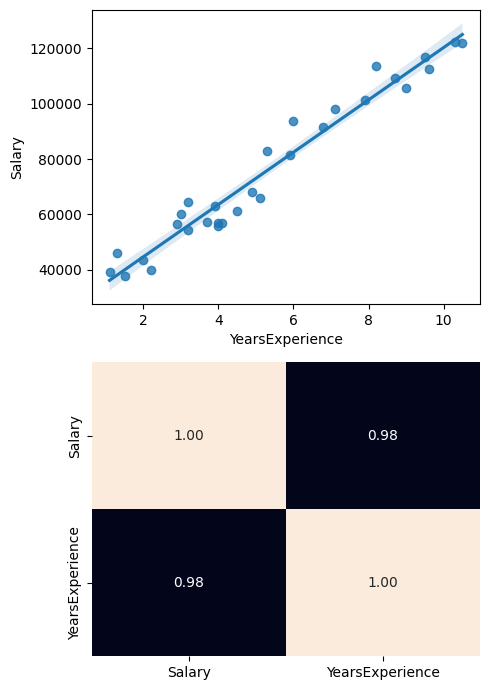

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 1, figsize = (5, 7))
total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0], data = total_data, x = "YearsExperience", y = "Salary")
sns.heatmap(total_data[["Salary", "YearsExperience"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

Existe una clara relación lineal entre la variable predictora y la objetivo, así que puede ser fácilmente modelizable por este tipo de modelos. Si la correlación fuera inferior, el modelo no tendría una buena precisión.

El conjunto train lo utilizaremos para entrenar el modelo, mientras que con el test lo evaluaremos para medir su grado de efectividad. Dividiremos también las predictoras de las características.

Además, al haber únicamente una variable predictora, no es necesario aplicar una normalización. En el caso de que hubiera varias sí que habría que aplicarla.

In [3]:
X_train = train_data.drop(["Salary"], axis = 1)
y_train = train_data["Salary"]
X_test = test_data.drop(["Salary"], axis = 1)
y_test = test_data["Salary"]

#### Paso 2: Inicialización y entrenamiento del modelo

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Después del proceso de entrenamiento podemos conocer los parámetros (variables $a$ y $b$) que ha ajustado el modelo:

In [5]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): 26354.43069701219
Coeficientes (b): [9277.78307971]


En este caso hay solo un coeficiente ya que la regresión lineal es simple.

#### Paso 3: Predicción del modelo

In [6]:
y_pred = model.predict(X_test)
y_pred

array([ 40271.10531658,  54187.77993614,  68104.45455571,  89443.35563904,
       102432.25195063, 121915.59641802])

Para comparar el valor predicho del original, podemos fácilmente realizar un plot comprativo como el siguiente:

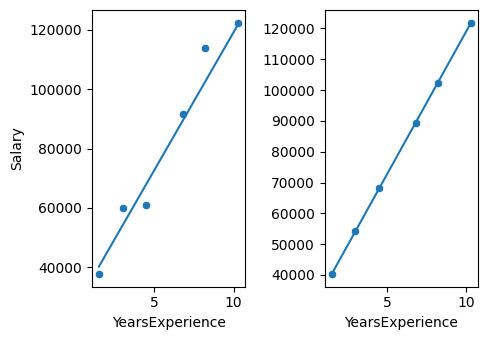

In [7]:
fig, axis = plt.subplots(1, 2, figsize = (5, 3.5))
total_data = pd.concat([train_data, test_data])

# Utilizamos los parámetros ajustados en el entrenamiento para dibujar la línea de regresión en los plots
regression_equation = lambda x: 26354.43069701219 + 9277.78307971 * x

sns.scatterplot(ax = axis[0], data = test_data, x = "YearsExperience", y = "Salary")
sns.lineplot(ax = axis[0], x = test_data["YearsExperience"], y = regression_equation(test_data["YearsExperience"]))
sns.scatterplot(ax = axis[1], x = test_data["YearsExperience"], y = y_pred)
sns.lineplot(ax = axis[1], x = test_data["YearsExperience"], y = regression_equation(test_data["YearsExperience"])).set(ylabel = None)

plt.tight_layout()

plt.show()

Como vemos, el test predicho por el modelo siempre se ajustará a la ecuación de regresión, ya que es la que ha aprendido el modelo. La figura de la izquierda representa los valores reales mientras que los de la derecha, los predichos. Vemos que algunos valores predichos coinciden con los reales y que los que no tienen una diferencia notable. Veremos a continuación el valor de la métrica para conocer más acerca del rendimiento del algoritmo.

Para calcular la efectividad del modelo utilizaremos el **error cuadrático medio** (*MSE*) y el **coeficiente de determinación** ($R^2$), unas de las métricas más populares:

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 37649779.451336615
Coeficiente de determinación: 0.959714925174946


Cuanto menor sea el valor del RMSE, mejor será el modelo. Un modelo perfecto (un modelo hipotético que siempre pueda predecir el valor esperado exacto) tendría un valor para esta métrica de 0. Observamos que hay un descuadre de 37 millones, por lo que podríamos entender que es muy malo. Si nos apoyamos en el valor del $R^2$, observamos que es de un 95%, un valor muy alto, luego el 95% de los datos están explicados por el modelo, por lo que es satisfactorio.

#### Paso 4: Optimización de resultados

Este tipo de modelos no se pueden optimizar, debido a la ausencia de hiperparámetros.

### Regresión lineal múltiple

Para ejemplificar la implementación de un modelo de regresión múltiple simple utilizaremos un conjunto de datos con pocas instancias y que ya ha sido previamente tratado con un EDA completo.

#### Paso 1. Lectura del conjunto de datos procesado

In [9]:
import pandas as pd
import matplotlib.pyplot as plt 

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_weight-height_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_weight-height_test.csv")

train_data.head()

,Gender,Height,Weight
0,-1.0,-0.575639,151.275533
1,-1.0,-0.992843,123.965162
2,-1.0,-0.925964,124.765438
3,-1.0,-1.478210,119.195698
4,1.0,-1.598649,146.956646


Para este problema, queremos calcular el peso (`weight`) en función de la altura (`height`) y del género (`gender`) de la persona. Por lo tanto, el peso será la variable dependiente (variable objetivo) y la altura y el género, las variables independientes (variables predictoras). Al tratarse de una predicción numérica continua, hemos de resolver esto con un modelo de regresión logística múltiple.

Como en este notebook no se ha mostrado el proceso de análisis exploratorio, a continuación y utilizando un diagrama de puntos se visualizará la relación entre la variable predictora y las variables objetivo (esto se ve en el análisis univariante):

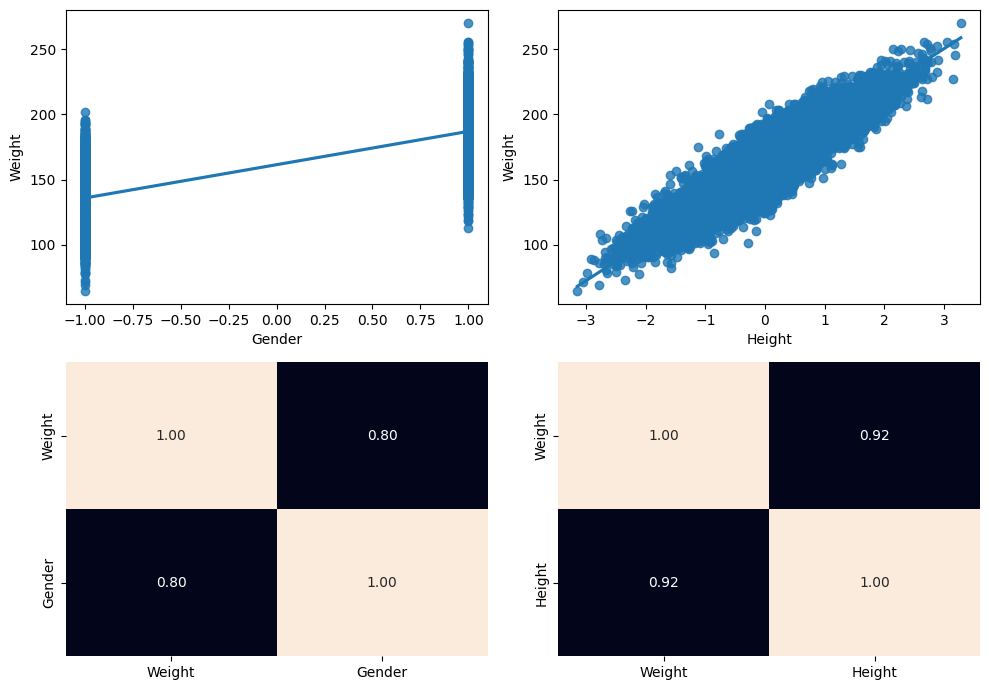

In [10]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))
total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0, 0], data = total_data, x = "Gender", y = "Weight")
sns.heatmap(total_data[["Weight", "Gender"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "Height", y = "Weight")
sns.heatmap(total_data[["Weight", "Height"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

plt.tight_layout()

plt.show()

Existe una clara relación lineal entre la variable predictora y las objetivo, así que puede ser fácilmente modelizable por este tipo de modelos. Si la correlación fuera inferior, el modelo no tendría una buena precisión.

In [11]:
X_train = train_data.drop(["Weight"], axis = 1)
y_train = train_data["Weight"]
X_test = test_data.drop(["Weight"], axis = 1)
y_test = test_data["Weight"]

#### Paso 2: Inicialización y entrenamiento del modelo

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Después del proceso de entrenamiento podemos conocer los parámetros (variables $a$ y $b_1, b_2$) que ha ajustado el modelo:

In [13]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a): 161.48606316160345
Coeficientes (b1, b2): [ 9.65020608 22.88377295]


#### Paso 3: Predicción del modelo

In [14]:
y_pred = model.predict(X_test)
y_pred

array([105.17851056, 188.29501423, 137.05824216, ..., 112.17172027,
       130.89667195, 137.46475059])

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 98.21235363443171
Coeficiente de determinación: 0.9075866115171992


Si nos apoyamos en el valor del $R^2$, observamos que es de un 90%, un valor muy alto, luego el 90% de los datos están explicados por el modelo, por lo que es satisfactorio.

#### Paso 4: Optimización de resultados

Este tipo de modelos no se pueden optimizar, debido a la ausencia de hiperparámetros.